
 Statistiques du Graphe 
Nombre de nœuds : 500
Nombre d'arêtes : 12458



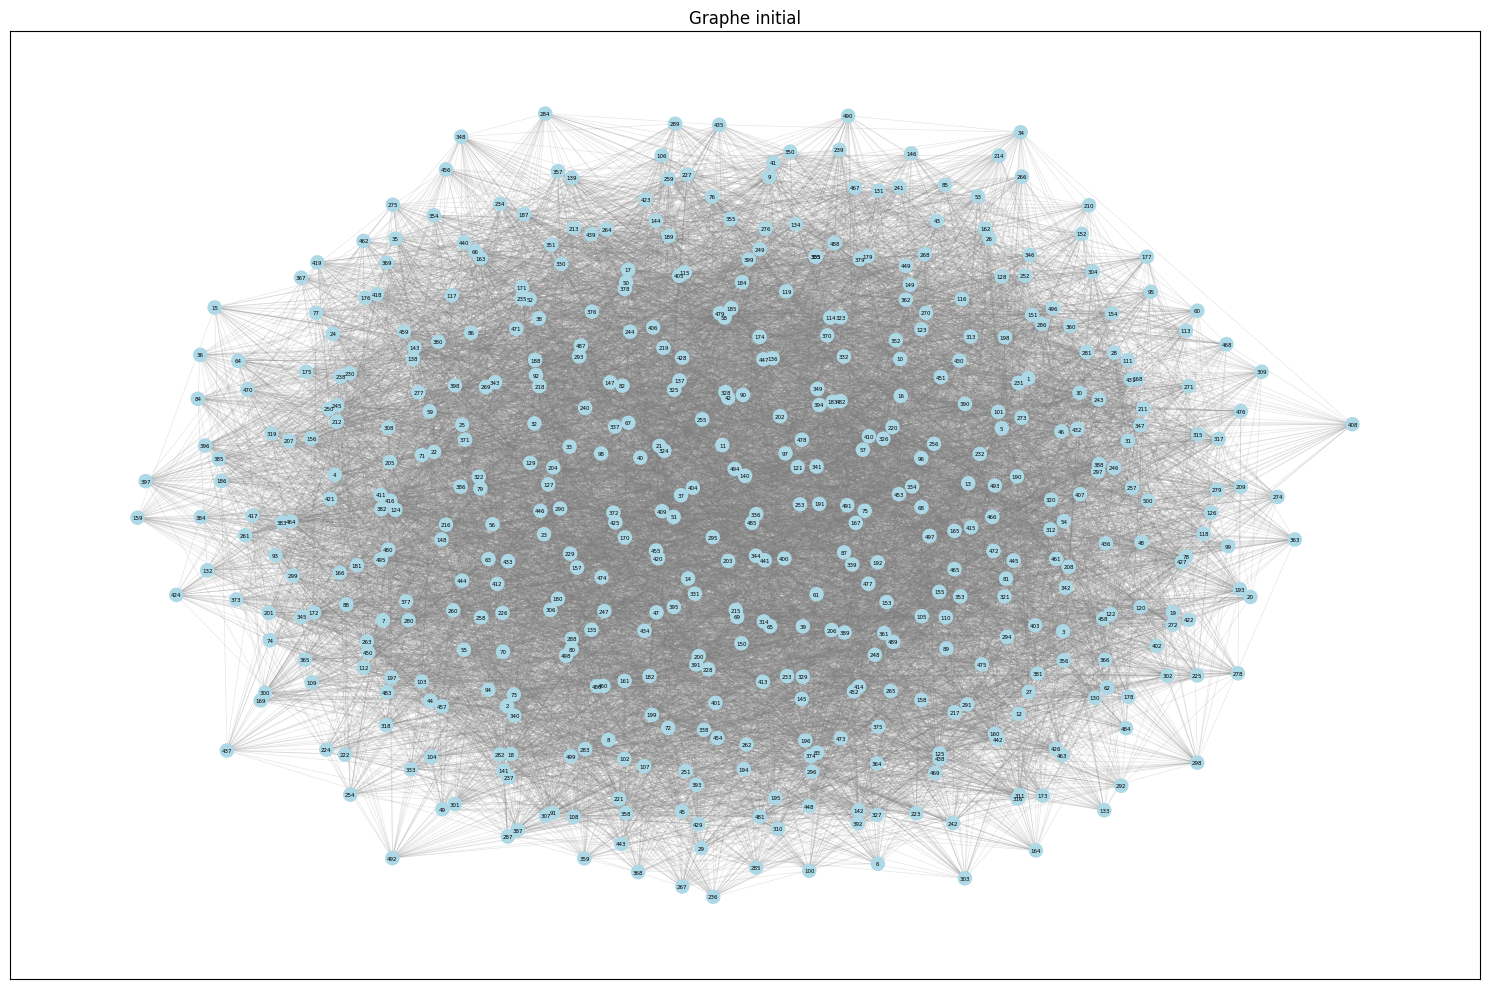

Nombre total de couleurs utilisées : 18
Affectation des couleurs :
Couleur 0: [6, 28, 32, 42, 58, 64, 65, 70, 130, 150, 191, 216, 239, 240, 247, 256, 270, 272, 303, 315, 321, 326, 328, 332, 341, 353, 404, 420, 422, 429, 433, 455, 494]
Couleur 1: [11, 52, 55, 56, 63, 81, 85, 97, 136, 161, 167, 170, 179, 213, 220, 225, 244, 260, 269, 274, 294, 295, 308, 324, 361, 389, 400, 405, 434, 452, 471, 491]
Couleur 2: [7, 16, 18, 39, 61, 90, 125, 135, 144, 174, 188, 190, 202, 203, 217, 250, 262, 264, 282, 284, 316, 322, 351, 364, 390, 406, 409, 428, 445, 446, 448, 475, 478, 482, 498]
Couleur 3: [9, 13, 29, 37, 40, 47, 67, 68, 87, 100, 102, 103, 134, 141, 145, 151, 204, 206, 230, 238, 255, 275, 288, 299, 323, 330, 334, 336, 343, 368, 391, 395, 430, 432, 439, 473, 489]
Couleur 4: [14, 26, 51, 101, 115, 131, 189, 201, 205, 209, 223, 229, 232, 246, 251, 254, 258, 263, 281, 327, 337, 339, 347, 386, 410, 425, 438, 453, 460, 472, 488, 499]
Couleur 5: [1, 21, 38, 57, 89, 105, 120, 127, 137, 140, 147, 155,

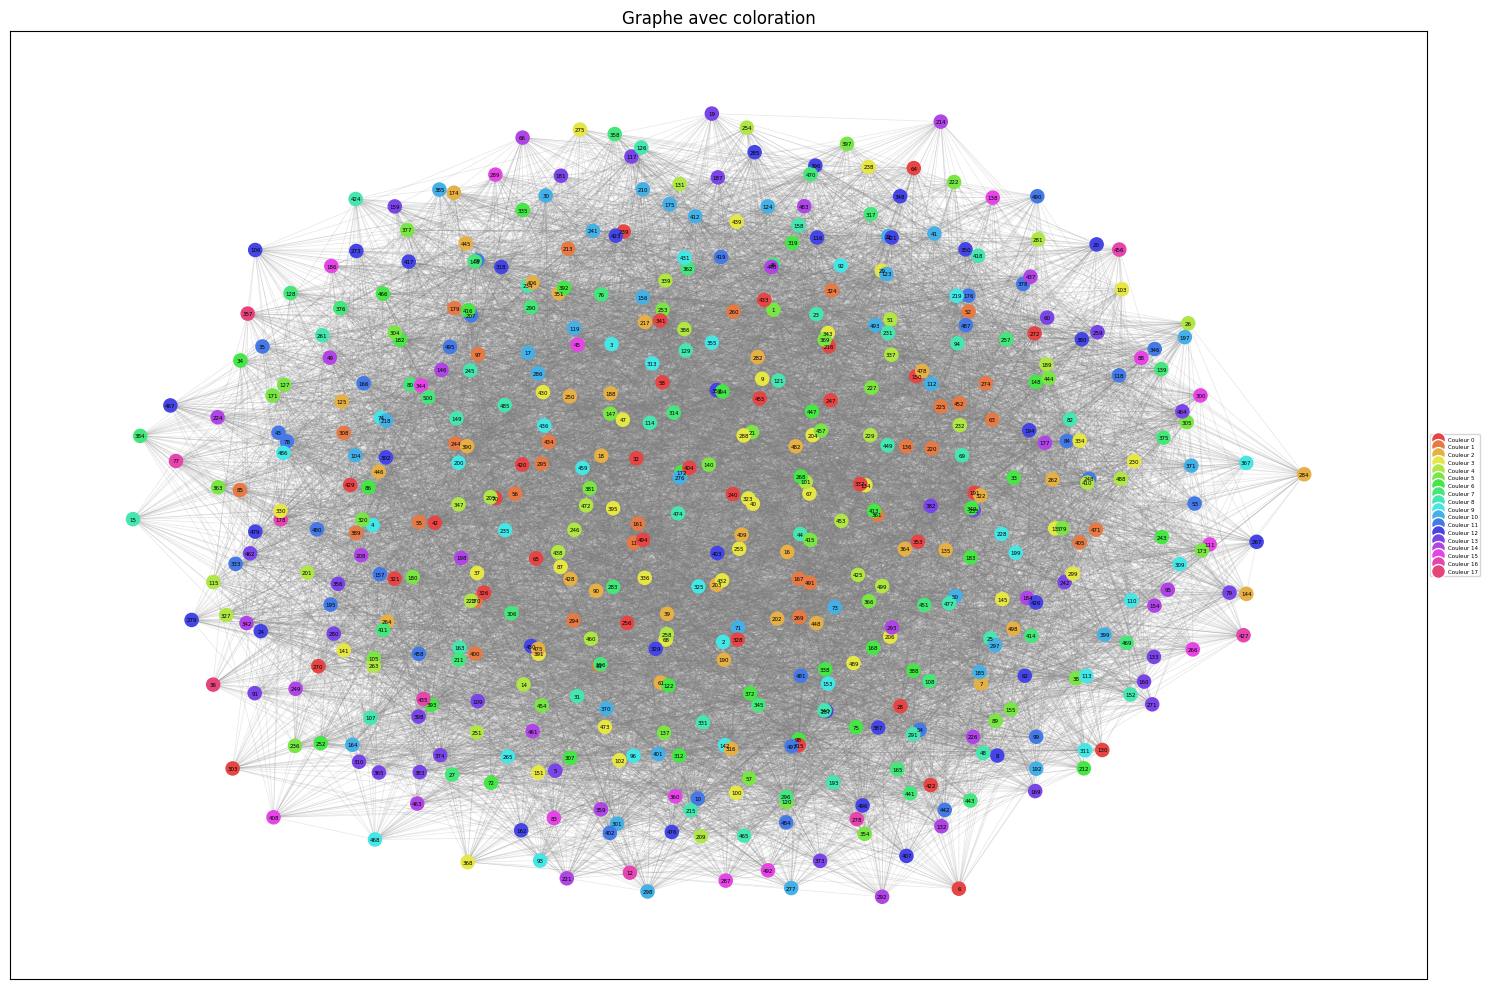


Temps d'exécution: 0.4579 secondes


In [ ]:
import time
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import colorsys


def get_graph_from_file():

    """
    Asks the user for a file, extracts the graph, and returns an adjacency matrix.
    """

    file_name = "dsjc500.1.col"

    try:
        with open(file_name, "r") as file:
            lines = file.readlines()

        num_vertices = 0
        adj_matrix = None
        problem_set = False  # Ensures we process the problem line before edges

        # Read the file line by line
        for line in lines:
            parts = line.strip().split()

            # Ignore comment lines
            if not parts or parts[0] == "c":
                continue

            # Read the number of vertices
            if parts[0] == "p" and parts[1] == "edge":
                num_vertices = int(parts[2])
                # Initialize adjacency matrix with zeros (0-based index)
                adj_matrix = np.zeros((num_vertices, num_vertices), dtype=int)
                problem_set = True

            # Read edges and populate the adjacency matrix
            elif parts[0] == "e":
                if not problem_set:
                    raise RuntimeError("Error: Edge descriptor found before problem line")
                v1, v2 = int(parts[1]) - 1, int(parts[2]) - 1  # Convert to 0-based index
                adj_matrix[v1][v2] = 1
                adj_matrix[v2][v1] = 1  # Since the graph is undirected

        return adj_matrix

    except FileNotFoundError:
        print("Error: File not found!")
        return None
    except RuntimeError as e:
        print(e)
        return None
    except Exception as e:
        print(f"Unexpected error: {e}")
        return None




def generate_distinct_colors(n):
    """
    Génère n couleurs distinctes en utilisant HSV color space.
    """
    colors = []
    for i in range(n):
        # Variation de la teinte (hue)
        h = i / n
        # Saturation fixe à 0.7 pour des couleurs vives mais pas trop
        s = 0.7
        # Luminosité fixe à 0.9 pour des couleurs claires
        v = 0.9
        # Conversion HSV vers RGB
        rgb = colorsys.hsv_to_rgb(h, s, v)
        colors.append(rgb)
    return colors



def represent_graph(adj_matrix, colors=None):
    """
    Représente le graphe avec sa coloration.
    Supporte un grand nombre de sommets avec des couleurs distinctes.

    Args:
        adj_matrix: Matrice d'adjacence du graphe
        colors: Liste des couleurs assignées aux sommets (optionnel)
    """
    plt.close('all')  # Ferme toutes les figures précédentes
  # Nettoie la figure courante

    num_nodes = adj_matrix.shape[0]
    num_edges = np.sum(adj_matrix) // 2

    # Création du graphe
    G = nx.Graph()
    G.add_nodes_from(range(1, num_nodes + 1))

    # Ajout des arêtes
    for i in range(num_nodes):
        for j in range(i + 1, num_nodes):
            if adj_matrix[i][j] == 1:
                G.add_edge(i + 1, j + 1)

    if colors is not None:
        # Générer autant de couleurs distinctes que nécessaire
        num_colors_needed = max(colors) + 1
        color_palette = generate_distinct_colors(num_colors_needed)
        node_colors = [color_palette[c] for c in colors]
        title = "Graphe avec coloration"
    else:
        print("\n Statistiques du Graphe ")
        print(f"Nombre de nœuds : {num_nodes}")
        print(f"Nombre d'arêtes : {num_edges}\n")
        node_colors = ['lightblue' for _ in range(num_nodes)]
        title = "Graphe initial"

    # Dessin du graphe
    plt.figure(figsize=(15, 10))  # Agrandi pour les grands graphes

    # Utiliser un layout plus adapté aux grands graphes
    if num_nodes > 100:
        pos = nx.spring_layout(G, k=1/np.sqrt(num_nodes), iterations=100)
    else:
        pos = nx.spring_layout(G, k=1/np.sqrt(num_nodes), iterations=50)

    # Ajuster la taille des nœuds en fonction du nombre total
    node_size = max(50, 2000 / np.sqrt(num_nodes))

    # Dessiner les arêtes
    nx.draw_networkx_edges(G, pos, edge_color='gray', alpha=0.2, width=0.5)

    # Dessiner les nœuds
    nx.draw_networkx_nodes(G, pos, node_size=node_size, node_color=node_colors)

    # Ajuster la taille des labels en fonction du nombre de nœuds
    font_size = max(4, 16 / np.sqrt(np.sqrt(num_nodes)))
    nx.draw_networkx_labels(G, pos, font_size=font_size)

    plt.title(title)

    # Légende pour les couleurs
    if colors is not None:
        unique_colors = sorted(set(colors))
        if len(unique_colors) <= 30:  # Limiter la légende si trop de couleurs
            legend_elements = [plt.Line2D([0], [0], marker='o', color='w',
                             markerfacecolor=color_palette[c],
                             label=f'Couleur {c}', markersize=10)
                             for c in unique_colors]
            plt.legend(handles=legend_elements, loc='center left',
                      bbox_to_anchor=(1, 0.5), fontsize=font_size)
        else:
            print(f"\nℹ️ Légende omise car trop de couleurs ({len(unique_colors)})")

    plt.tight_layout()
    plt.show()




def display_solution(solution, chromatic_number):

    print("Nombre total de couleurs utilisées :", chromatic_number)
    print("Affectation des couleurs :")
    color_groups = {}
    for vertex, color in enumerate(solution):
        if color not in color_groups:
            color_groups[color] = []
        color_groups[color].append(vertex+1)

    for color, vertices in sorted(color_groups.items()):
        print(f"Couleur {color}: {vertices}")




def welsh_powell(matrice_adj):
    """
    Algorithme de coloration Welsh et Powell.
    """
    temps_debut = time.time()
    n = len(matrice_adj)
    degres = sorted(range(n), key=lambda v: sum(matrice_adj[v]), reverse=True)
    couleurs = [-1] * n
    nb_couleurs = 0

    for sommet in degres:
        if couleurs[sommet] == -1:  #
            couleurs[sommet] = nb_couleurs

            for autre in degres:
                if couleurs[autre] == -1:
                    if all(matrice_adj[autre][voisin] == 0 or couleurs[voisin] != nb_couleurs for voisin in range(n)):
                        couleurs[autre] = nb_couleurs

            nb_couleurs += 1
    temps_execution = time.time() - temps_debut

    return couleurs, nb_couleurs, temps_execution


def main():
    """
    Main function that integrates all the modules:
    - Reads a graph from a file
    - Represents the graph
    - Runs the welsh and powell algorithm
    - Displays the solution
    """
    # Load the adjacency matrix from the file
    adj_matrix = get_graph_from_file()
    if adj_matrix is None:
        print("Failed to load the graph. Exiting...")
        return

    # Represent the initial graph
    represent_graph(adj_matrix)

    # Run the welsh and powell algorithm
    solution, colors_number, execution_time = welsh_powell(adj_matrix)

    # Display the solution
    display_solution(solution, colors_number)

    # Represent the graph with its coloring
    represent_graph(adj_matrix, solution)

    print(f"\nTemps d'exécution: {execution_time:.4f} secondes")

if __name__ == "__main__":
    main()
